In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
plt.rcParams['figure.figsize']= (10, 7)

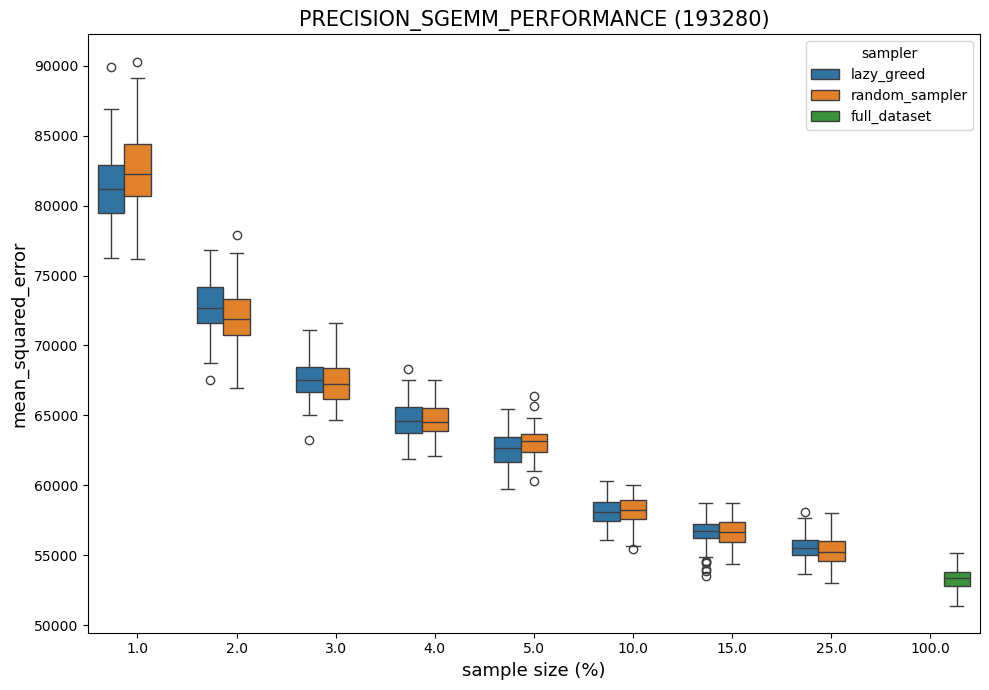

In [3]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]
file = files[0]
result = pd.read_csv(file)
size = result.sample_size.max()

result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
# result = result[result.sample_size>4]
result = result[
    (result.metric == 'mean_squared_error') & 
    ~(result.sampler == 'kmeans_sampler')
]
sns.boxplot(data=result, x='sample_size', y='value', hue='sampler')
plt.title(f'{file.stem.upper()} ({size})',  fontsize=15)
plt.ylabel(result.metric.unique()[0], fontsize=13)
plt.xlabel('sample size (%)', fontsize=13)
plt.tight_layout()
plt.show()

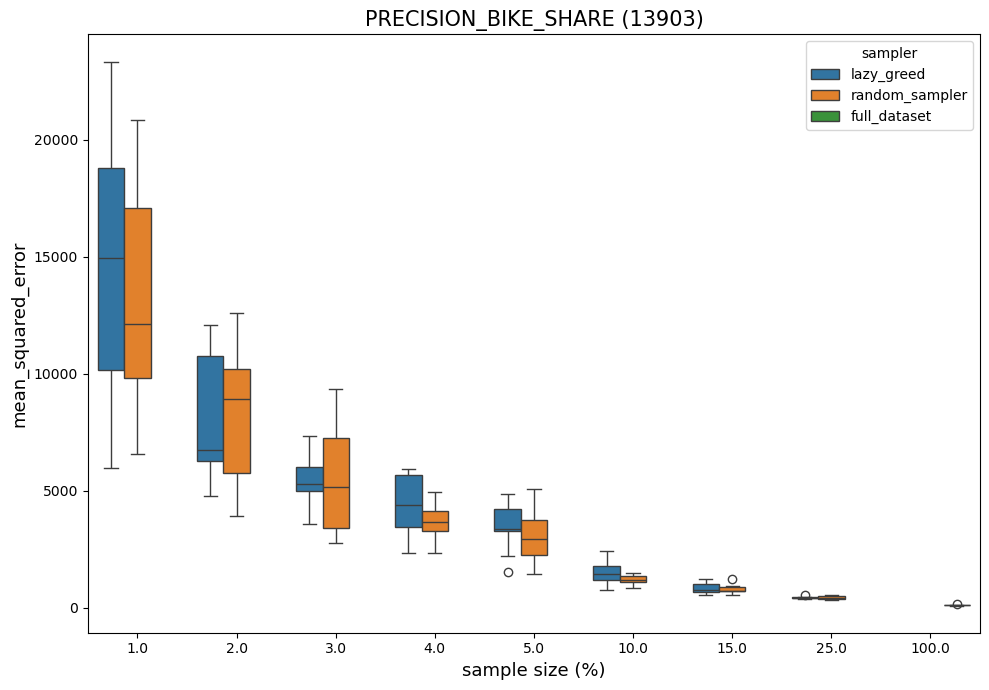

In [4]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]
file = files[1]

result = pd.read_csv(file)
size = result.sample_size.max()
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
# result = result[result.sample_size>4]
result = result[
    (result.metric == 'mean_squared_error') & 
    ~(result.sampler == 'kmeans_sampler')
]
sns.boxplot(data=result, x='sample_size', y='value', hue='sampler')
plt.title(f'{file.stem.upper()} ({size})',  fontsize=15)
plt.ylabel(result.metric.unique()[0], fontsize=13)
plt.xlabel('sample size (%)', fontsize=13)
plt.tight_layout()
plt.show()

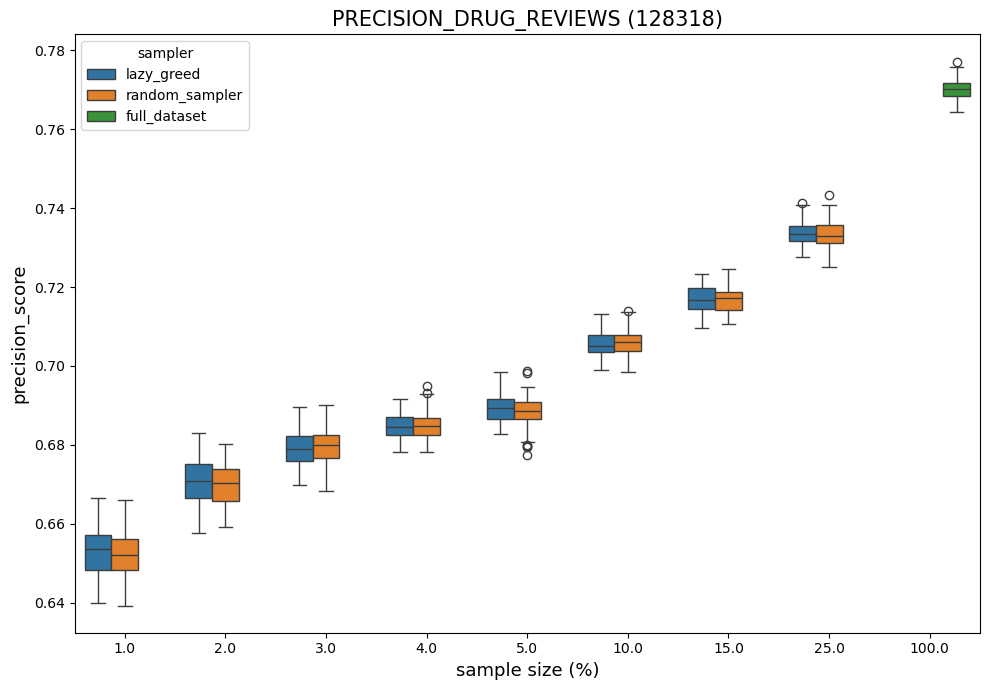

In [5]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]
file = files[2]

result = pd.read_csv(file)
size = result.sample_size.max()
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
# result = result[result.sample_size>4]
result = result[
    (result.metric == 'precision_score') & 
    ~(result.sampler == 'kmeans_sampler')
]
sns.boxplot(data=result, x='sample_size', y='value', hue='sampler')
plt.title(f'{file.stem.upper()} ({size})',  fontsize=15)
plt.ylabel(result.metric.unique()[0], fontsize=13)
plt.xlabel('sample size (%)', fontsize=13)
plt.tight_layout()
plt.show()

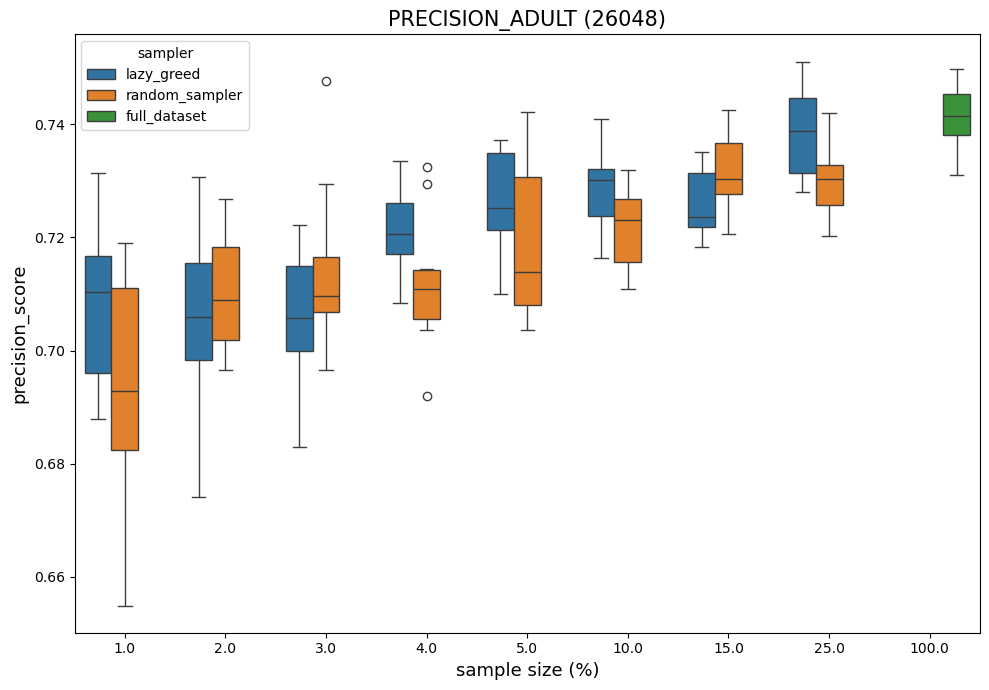

In [6]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]
file = files[5]

result = pd.read_csv(file)
size = result.sample_size.max()
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
# result = result[result.sample_size>4]
result = result[
    (result.metric == 'precision_score') & 
    ~(result.sampler == 'kmeans_sampler')
]
sns.boxplot(data=result, x='sample_size', y='value', hue='sampler')
plt.title(f'{file.stem.upper()} ({size})',  fontsize=15)
plt.ylabel(result.metric.unique()[0], fontsize=13)
plt.xlabel('sample size (%)', fontsize=13)
plt.tight_layout()
plt.show()

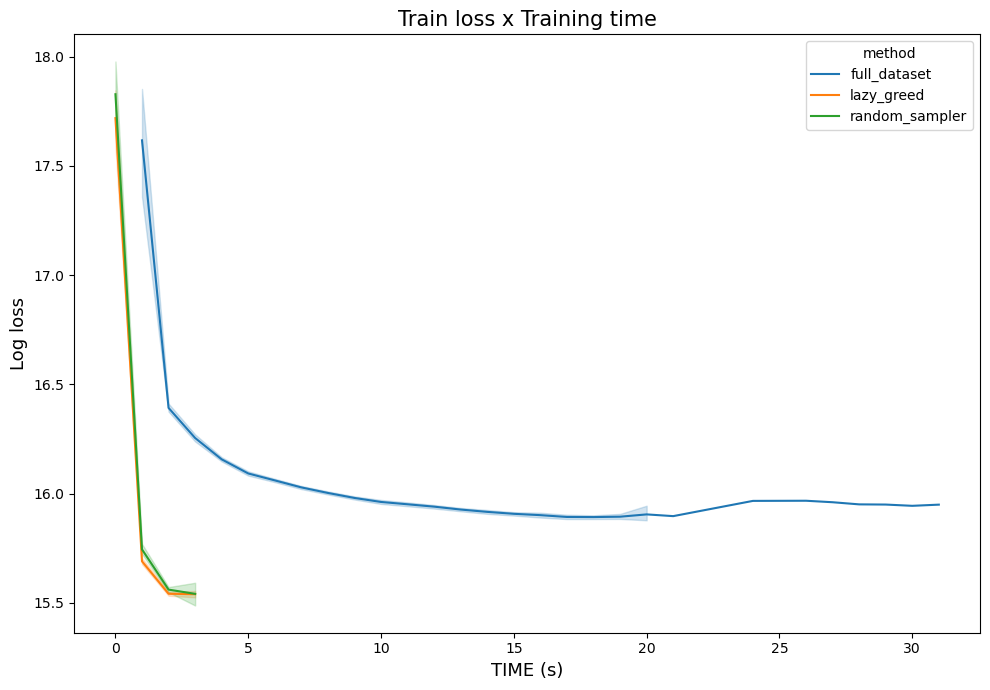

In [31]:
result = pd.read_csv('/Users/victor/Documents/projects/coreset/results/drugs_review/curve_drug_reviews.csv')
result['elapsed'] = result['elapsed'].astype(int)
# result['elapsed'] = result['elapsed'].round(0)

# sns.lineplot(result, x='elapsed', y='hist', hue='method')
sns.lineplot(result, x='elapsed', y='hist', hue='method')
plt.title('Train loss x Training time', fontsize=15)
plt.xlabel('TIME (s)', fontsize=13)
plt.ylabel('Log loss', fontsize=13)
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/b_size_sgemm_performance.csv')]
B_SIZE_SGEMM_PERFORMANCE


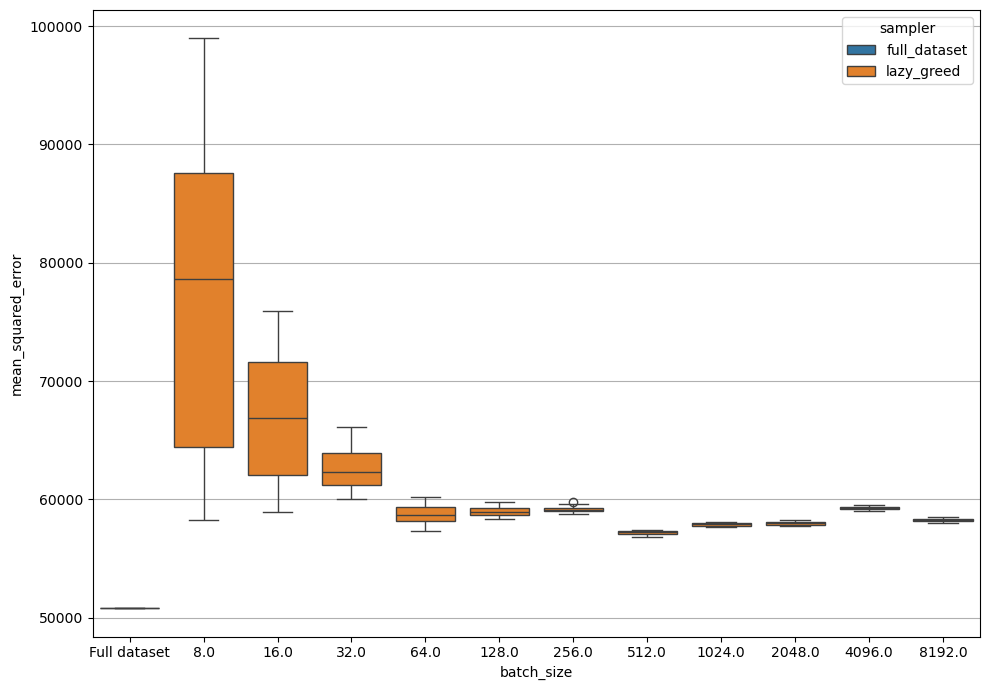

In [24]:
curdir = Path()
files = [*curdir.rglob('b_size*.csv')]

print(files)


print(f'{files[0].stem.upper()}')


result = pd.read_csv(files[0])

result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
result = result.fillna('Full dataset')
sns.boxplot(data=result, x='batch_size', y='value', hue='sampler')
# plt.yscale('log')
plt.ylabel(result.metric.unique()[-1])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
result

,sampler,sample_size,train_size,batch_size,metric,value
0,full_dataset,100.0,193280,Full dataset,mean_squared_error,54113.965438
1,full_dataset,100.0,193280,Full dataset,mean_squared_error,54647.772261
2,full_dataset,100.0,193280,Full dataset,mean_squared_error,53597.847750
3,full_dataset,100.0,193280,Full dataset,mean_squared_error,53708.983853
4,full_dataset,100.0,193280,Full dataset,mean_squared_error,52889.288634
...,...,...,...,...,...,...
355,lazy_greed,10.0,193280,8192.0,mean_squared_error,58256.995680
356,lazy_greed,10.0,193280,8192.0,mean_squared_error,58543.055237
357,lazy_greed,10.0,193280,8192.0,mean_squared_error,58303.554106
358,lazy_greed,10.0,193280,8192.0,mean_squared_error,59453.719164
